# Exoplanet exploration using Machine Learning


## What are exoplanets?

Exoplanets are planets beyond our own solar system. Thousands have been discovered in the past two decades, mostly with NASA’s Kepler Space Telescope.

These exoplanets come in a huge variety of sizes and orbits. Some are gigantic planets hugging close to their parent stars; others are icy, some rocky. NASA and other agencies are looking for a special kind of planet: one that’s the same size as Earth, orbiting a sun-like star in the habitable zone.


The habitable zone is the area around a star where it is not too hot and not too cold for liquid water to exist on the surface of surrounding planets. Imagine if Earth was where Pluto is. The Sun would be barely visible (about the size of a pea) and Earth’s ocean and much of its atmosphere would freeze.

You can also check out my article to understand more about exoplanets at [www.theaidream.com](https://www.theaidream.com/post/exoplanet-exploration-using-machine-learning)

In [1]:
import os
for dirname, _, filenames in os.walk('archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive/exoTest.csv
archive/exoTrain.csv


### Load all the required libraries

In [2]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns


### Load the train and test data.

In [3]:
test_data = pd.read_csv('archive/exoTest.csv')
train_data = pd.read_csv('archive/exoTrain.csv')

In [4]:
train_data

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0      -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1      -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2      486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3      311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4    -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   
...       ...     ...  ...        ...        ...        ...        ...   
5082   -49.25  -30.92  ...     139.95     147.26     156.95     155.64   
5083   458.87  492.84  ...     -26.50      -4.84     -76.30     -37.84   
5084   254.88  237.60  ...     -26.82     -53.89     -48.71      30.99   
5085    -0.03    3.28  ...      10.86      -3.23      -5.10      -4.61   
5086   178.93  118.93  ...      71.19       0.97      55.20      -1.63   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0         48.57      92.54      39.32      61.42       5.08     -39.54  
1         -4.86       0.76     -11.70       6.46      16.00      19.93  
2        -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3         20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4       -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  
...         ...        ...        ...        ...        ...        ...  
5082     156.36     151.75     -24.45     -17.00       3.23      19.28  
5083    -153.83    -136.16      38.03     100.28     -45.64      35.58  
5084      15.96      -3.47      65.73      88.42      79.07      79.43  
5085      -9.82      -1.50      -4.65     -14.55      -6.41      -2.55  
5086      -5.50     -25.33     -41.31     -16.72     -14.09      27.82  

[5087 rows x 3198 columns]

Now the target column LABEL consists of two categories 1(Does not represents exoplanet) and 2(represents the presence of exoplanet). So, convert them to binary values for easier processing of data.

In [5]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

Now visualize the target column in the train_dataset and get an idea about the class distribution.

In [6]:
train_data.describe()

LABEL        FLUX.1        FLUX.2        FLUX.3        FLUX.4  \
count  5087.000000  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean      0.007273  1.445054e+02  1.285778e+02  1.471348e+02  1.561512e+02   
std       0.084982  2.150669e+04  2.179717e+04  2.191309e+04  2.223366e+04   
min       0.000000 -2.278563e+05 -3.154408e+05 -2.840018e+05 -2.340069e+05   
25%       0.000000 -4.234000e+01 -3.952000e+01 -3.850500e+01 -3.505000e+01   
50%       0.000000 -7.100000e-01 -8.900000e-01 -7.400000e-01 -4.000000e-01   
75%       0.000000  4.825500e+01  4.428500e+01  4.232500e+01  3.976500e+01   
max       1.000000  1.439240e+06  1.453319e+06  1.468429e+06  1.495750e+06   

             FLUX.5        FLUX.6        FLUX.7        FLUX.8        FLUX.9  \
count  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   1.561477e+02  1.469646e+02  1.168380e+02  1.144983e+02  1.228639e+02   
std    2.308448e+04  2.410567e+04  2.414109e+04  2.290691e+04  2.102681e+04   
min   -4.231956e+05 -5.975521e+05 -6.724046e+05 -5.790136e+05 -3.973882e+05   
25%   -3.195500e+01 -3.338000e+01 -2.813000e+01 -2.784000e+01 -2.683500e+01   
50%   -6.100000e-01 -1.030000e+00 -8.700000e-01 -6.600000e-01 -5.600000e-01   
75%    3.975000e+01  3.514000e+01  3.406000e+01  3.170000e+01  3.045500e+01   
max    1.510937e+06  1.508152e+06  1.465743e+06  1.416827e+06  1.342888e+06   

       ...     FLUX.3188     FLUX.3189     FLUX.3190     FLUX.3191  \
count  ...  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   ...  3.485578e+02  4.956476e+02  6.711211e+02  7.468790e+02   
std    ...  2.864786e+04  3.551876e+04  4.349963e+04  4.981375e+04   
min    ... -3.240480e+05 -3.045540e+05 -2.933140e+05 -2.838420e+05   
25%    ... -1.760000e+01 -1.948500e+01 -1.757000e+01 -2.076000e+01   
50%    ...  2.600000e+00  2.680000e+00  3.050000e+00  3.590000e+00   
75%    ...  2.211000e+01  2.235000e+01  2.639500e+01  2.909000e+01   
max    ...  1.779338e+06  2.379227e+06  2.992070e+06  3.434973e+06   

          FLUX.3192     FLUX.3193      FLUX.3194      FLUX.3195  \
count  5.087000e+03  5.087000e+03    5087.000000    5087.000000   
mean   6.937372e+02  6.553031e+02    -494.784966    -544.594264   
std    5.087103e+04  5.339979e+04   17844.469520   17722.339334   
min   -3.288214e+05 -5.028894e+05 -775322.000000 -732006.000000   
25%   -2.226000e+01 -2.440500e+01     -26.760000     -24.065000   
50%    3.230000e+00  3.500000e+00      -0.680000       0.360000   
75%    2.780000e+01  3.085500e+01      18.175000      18.770000   
max    3.481220e+06  3.616292e+06  288607.500000  215972.000000   

           FLUX.3196      FLUX.3197  
count    5087.000000    5087.000000  
mean     -440.239100    -300.536399  
std     16273.406292   14459.795577  
min   -700992.000000 -643170.000000  
25%       -21.135000     -19.820000  
50%         0.900000       1.430000  
75%        19.465000      20.280000  
max    207590.000000  211302.000000  

[8 rows x 3198 columns]

In [7]:
train_data['LABEL'].value_counts()

LABEL
0    5050
1      37
Name: count, dtype: int64

We have 5050 records of non-exoplanets and 37 records of exoplanets.

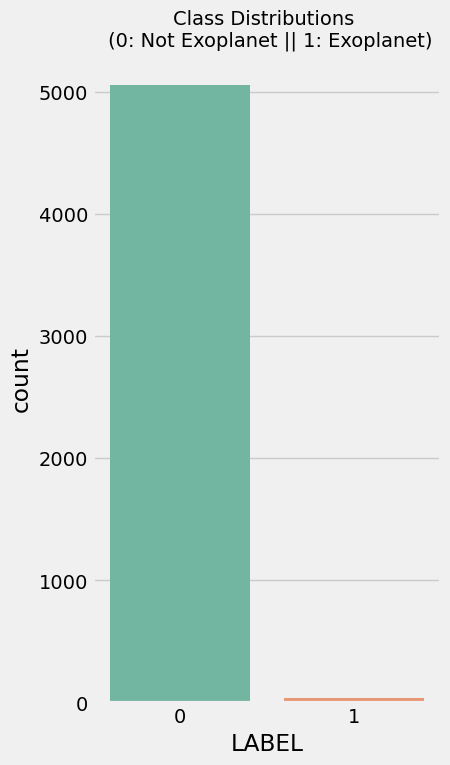

In [8]:
plt.figure(figsize=(4,8))
colors = ["0", "1"]
sns.countplot(x='LABEL', data=train_data, palette = "Set2")
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)
plt.show()

It turns out that the data is highly imbalanced so later on we'll be using some sampling techniques to balance the data.

### Plotting heatmap of missing values

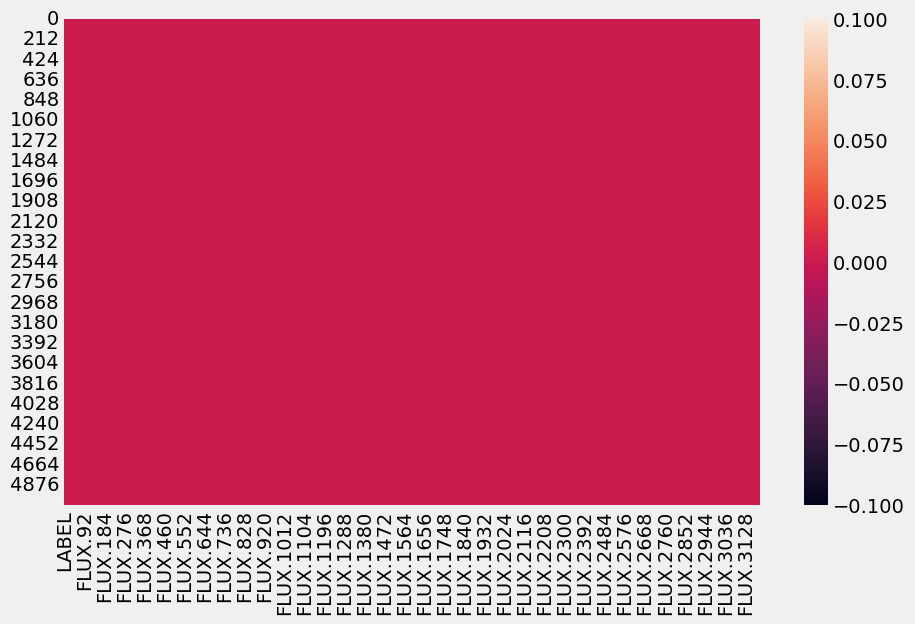

In [9]:
sns.heatmap(train_data.isnull())
plt.show()

We can clearly see that we dont have any missing values in our dataset.

**Flux :** the intensity of light recived from a planet

### Let us plot the first 4 rows of the train data and observe the intensity of flux values.

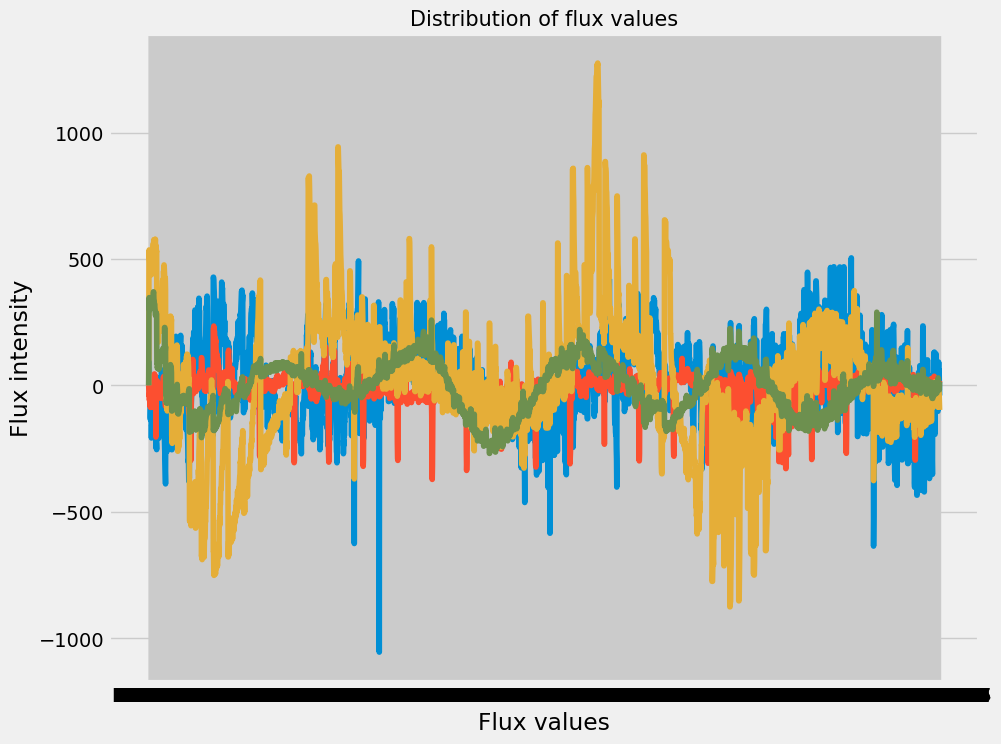

In [10]:
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[1,])
plt.plot(train_data.iloc[2,])
plt.plot(train_data.iloc[3,])
plt.show()

### Plotting the correlation matrix

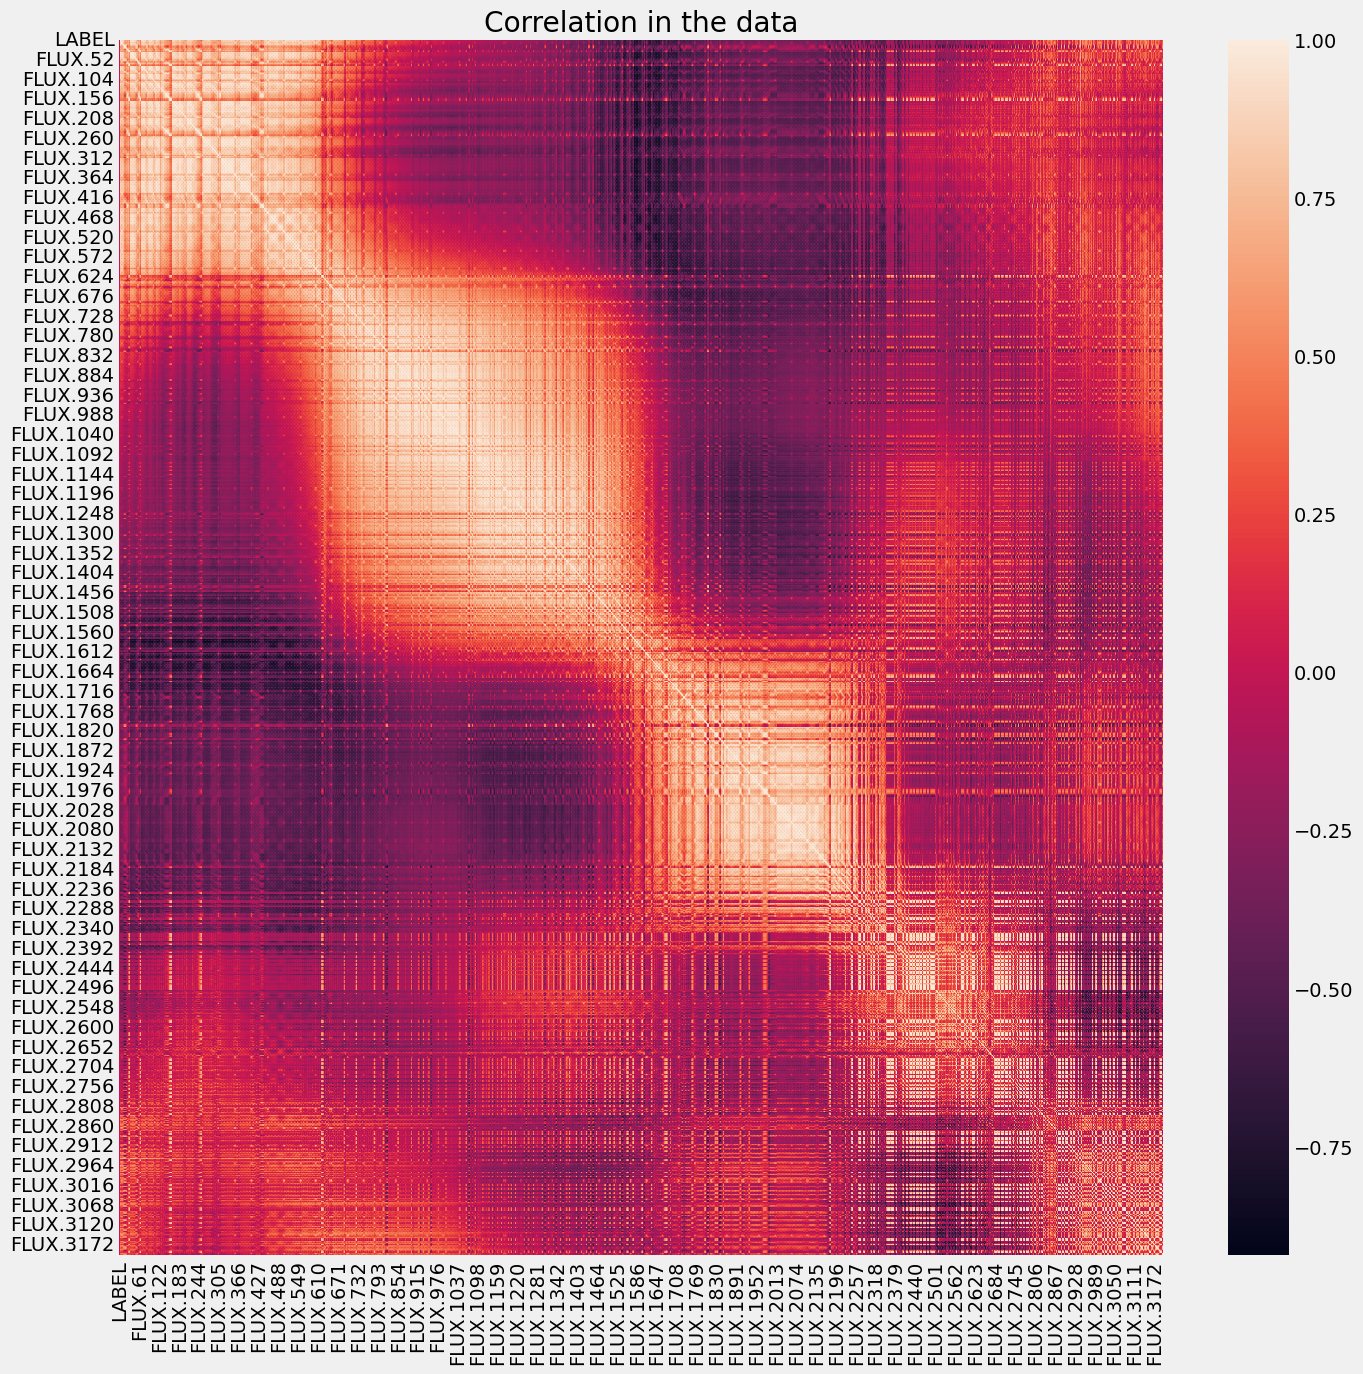

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr())
plt.title('Correlation in the data')
plt.show()

### plot the Gaussian histogram of non-exoplanets data.

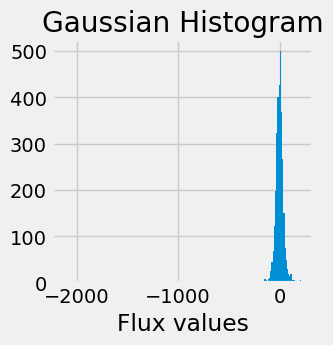

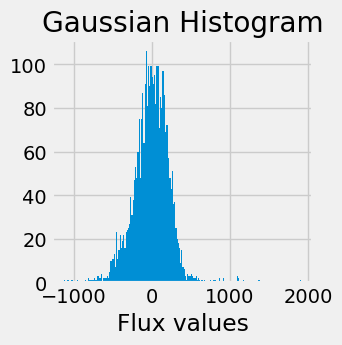

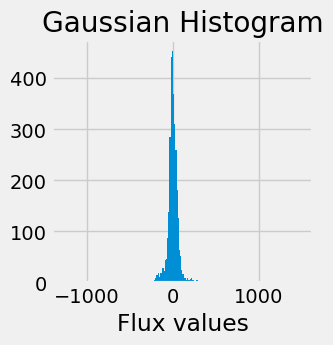

In [12]:
labels_1=[100,200,300]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

### plot Gaussian histogram of the data when exoplanets are present.

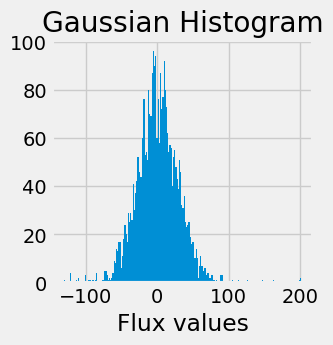

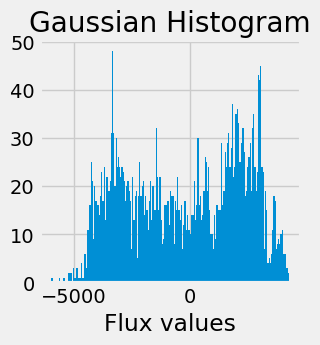

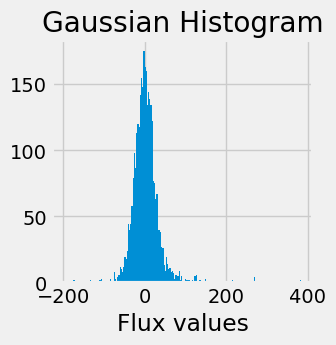

In [13]:
labels_1=[16,21,25]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

### Detecting outliers using Boxplot

Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. 

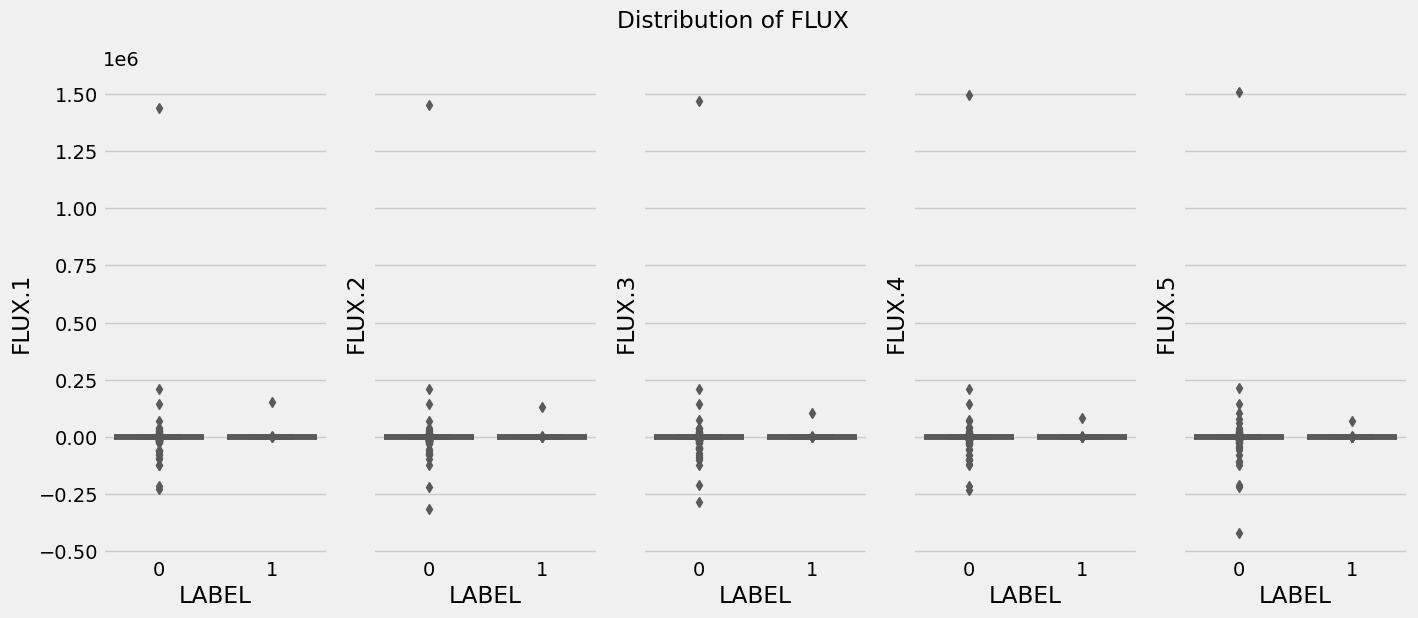

In [14]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.5',palette="Set2")
plt.show()

In [15]:
print('Dropping Outliers')
train_data.drop(train_data[train_data['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


### Split the dataset

So let us first split our dataset and normalize it.

In [33]:
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]
#x_test

FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7   FLUX.8  \
0     119.88   100.21    86.46    48.68    46.12    39.39    18.57     6.98   
1    5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39  5569.47   
2     844.48   817.49   770.07   675.01   605.52   499.45   440.77   362.95   
3    -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22  -746.50   
4     -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   -45.20   
..       ...      ...      ...      ...      ...      ...      ...      ...   
565   374.46   326.06   319.87   338.23   251.54   209.84   186.35   167.46   
566    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10    -4.54   
567   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   -24.71   
568    91.36    85.60    48.81    48.69    70.05    22.30    11.63    37.86   
569  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09  1142.09   

      FLUX.9  FLUX.10  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0       6.63   -21.97  ...      14.52      19.29      14.44      -1.62   
1    5550.44  5458.80  ...    -581.91    -984.09   -1230.89   -1600.45   
2     207.27   150.46  ...      17.82     -51.66     -48.29     -59.99   
3    -709.53  -679.56  ...     122.34      93.03      93.03      68.81   
4      -5.04    14.62  ...     -37.87     -61.85     -27.15     -21.18   
..       ...      ...  ...        ...        ...        ...        ...   
565   135.45   107.28  ...    -123.55    -166.90    -222.44    -209.71   
566   -11.55   -10.48  ...     -12.40      -5.99     -17.94     -11.96   
567   -13.12   -14.78  ...      -0.73      -1.64       1.58      -4.82   
568    28.27    -4.36  ...       2.44      11.53     -16.42     -17.86   
569   902.31   714.47  ...     695.41     865.97     882.41    1203.06   

     FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0        13.33      45.50      31.93      35.78     269.43      57.72  
1     -1824.53   -2061.17   -2265.98   -2366.19   -2294.86   -2034.72  
2       -82.10    -174.54     -95.23    -162.68     -36.79      30.63  
3         9.81      20.75      20.25    -120.81    -257.56    -215.41  
4       -33.76     -85.34     -81.46     -61.98     -69.34     -17.84  
..         ...        ...        ...        ...        ...        ...  
565    -180.16    -166.83    -235.66    -213.63    -205.99    -194.07  
566     -12.11     -13.68      -3.59      -5.32     -10.98     -11.24  
567     -11.93     -17.14      -4.25       5.47      14.46      18.70  
568      21.10     -10.25     -37.06      -8.43      -6.48      17.60  
569    1293.03    1354.41    -192.81    -277.22     -69.63     121.56  

[570 rows x 3197 columns]

### Data Normalization

**Data Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [38]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)
x_test

array([[ 0.06708107,  0.06699212,  0.06681496, ..., -0.01668739,
        -0.01669571, -0.01669995],
       [ 0.06709593,  0.06700693,  0.06682968, ..., -0.01668009,
        -0.01668857, -0.0166929 ],
       [ 0.06712569,  0.0670366 ,  0.06685916, ..., -0.01666534,
        -0.01667413, -0.01667861],
       ...,
       [ 0.03327144,  0.03316949,  0.0329665 , ...,  0.01643138,
         0.01635238,  0.01631281],
       [ 0.03333945,  0.03323747,  0.03303443, ...,  0.01628588,
         0.01620726,  0.01616788],
       [ 0.03337352,  0.03327153,  0.03306846, ...,  0.01621331,
         0.01613487,  0.01609559]])

### Apply gaussian filters

The next step is to apply gaussian filters to both test and train.


In probability theory, the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

In [39]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)
x_test

array([[ 0.06401338,  0.06395072,  0.06382581, ..., -0.01578743,
        -0.01579707, -0.01580189],
       [ 0.06402364,  0.06396095,  0.06383598, ..., -0.01576621,
        -0.01577598, -0.01578086],
       [ 0.06404405,  0.06398129,  0.06385621, ..., -0.01572359,
        -0.01573361, -0.01573863],
       ...,
       [ 0.02784653,  0.02777749,  0.02763989, ...,  0.02168963,
         0.02161681,  0.02158033],
       [ 0.02787757,  0.02780852,  0.0276709 , ...,  0.02158957,
         0.02151692,  0.02148053],
       [ 0.02789327,  0.02782422,  0.02768658, ...,  0.02153897,
         0.0214664 ,  0.02143005]])

### Feature scaling

we use feature scaling so that all the values remain in the comparable range.

In [19]:
#Feature scaling
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

### Model Building

Validation accuracy of KNN is 0.9912280701754386

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



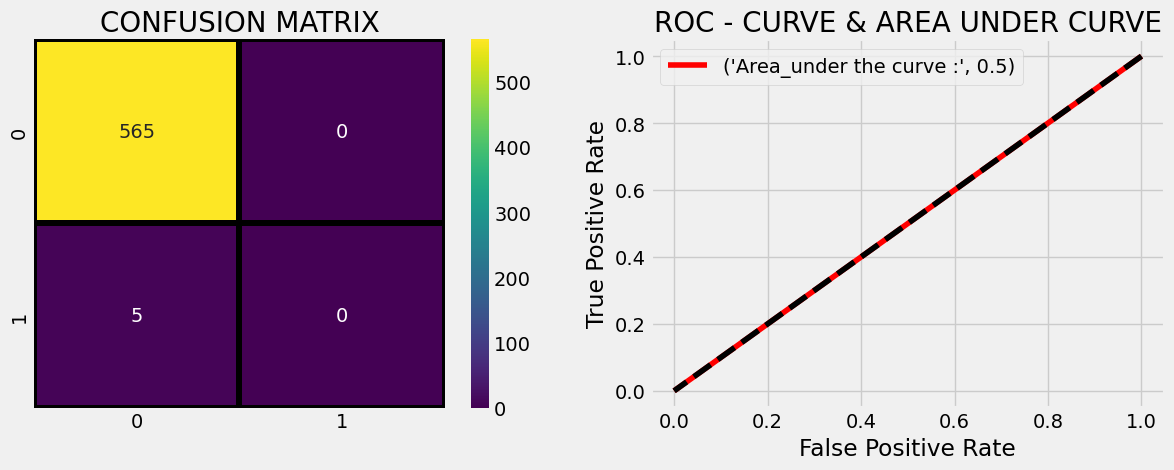

In [20]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(x_train,y_train)
prediction=knn_model.predict(x_test)
print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

Validation accuracy of Logistic Regression is 0.9842105263157894

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.98       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.98      0.98       570



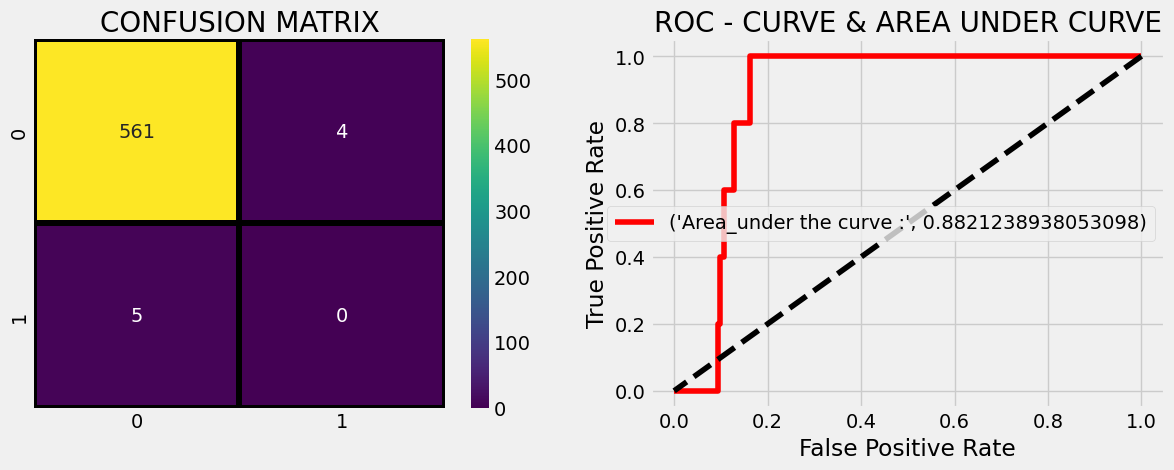

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(x_train,y_train)

prediction=lr_model.predict(x_test)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

Validation accuracy of Decision Tree is 0.9614035087719298

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       565
           1       0.00      0.00      0.00         5

    accuracy                           0.96       570
   macro avg       0.50      0.48      0.49       570
weighted avg       0.98      0.96      0.97       570



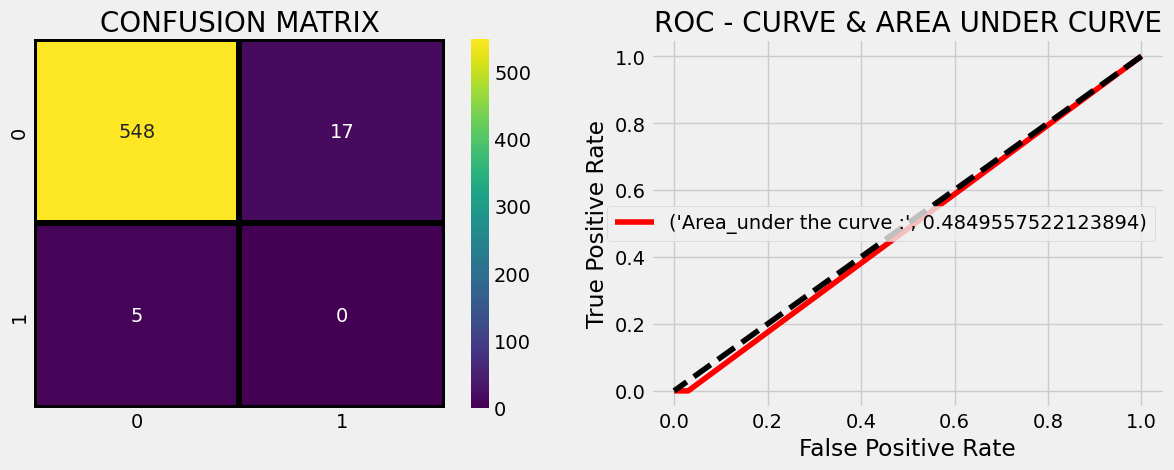

In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(x_train,y_train)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

Since the dataset is highly imbalanced even if the model predicts the same class for all data points the accuracy.

So let us first balance the classes and model it again.

### Balancing the class using SMOTE

**SMOTE** **(synthetic minority oversampling technique)** is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. **SMOTE** synthesises new minority instances between existing minority instances.

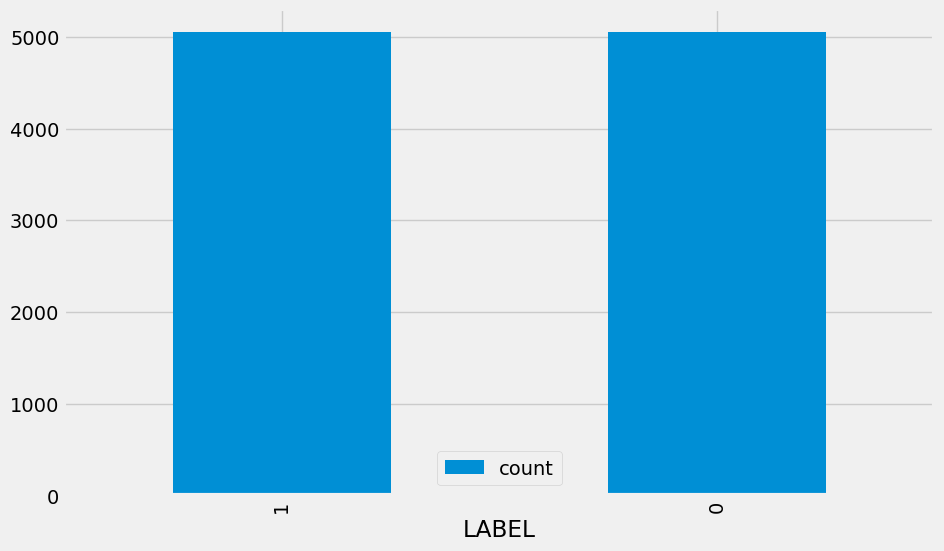

In [23]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(train_data.drop('LABEL',axis=1), train_data['LABEL'])
ov_train_y = ov_train_y.astype('int')

ov_train_y.value_counts().reset_index().plot(kind='bar', x='LABEL', y='count')
plt.show()



### Split the dataset

In [24]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

Validation accuracy of Decision Tree is 0.9351935193519352

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1709
           1       0.89      0.98      0.94      1624

    accuracy                           0.94      3333
   macro avg       0.94      0.94      0.94      3333
weighted avg       0.94      0.94      0.94      3333



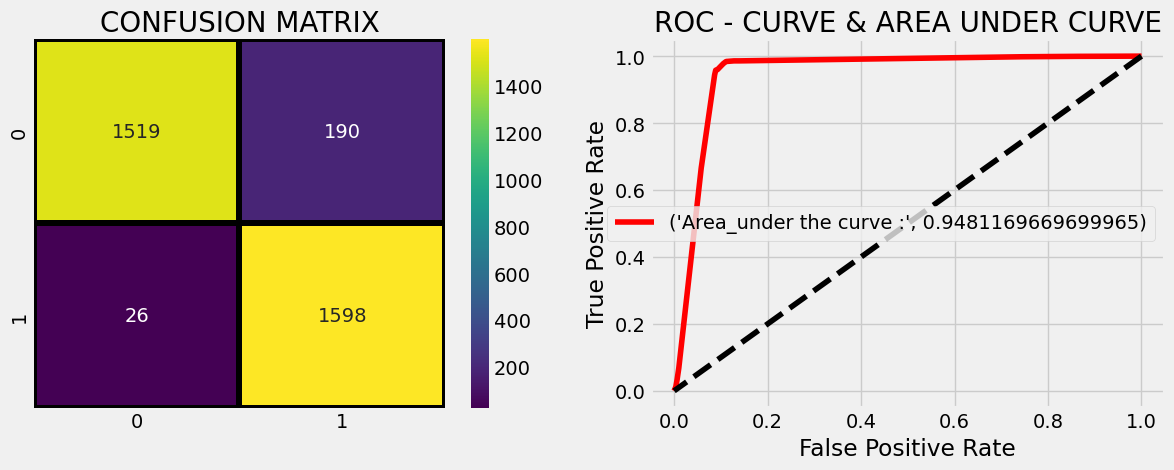

In [25]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(train_X,train_y)

prediction=ds_model.predict(test_X)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

Validation accuracy of KNN is 0.9822982298229823

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1709
           1       0.96      1.00      0.98      1624

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



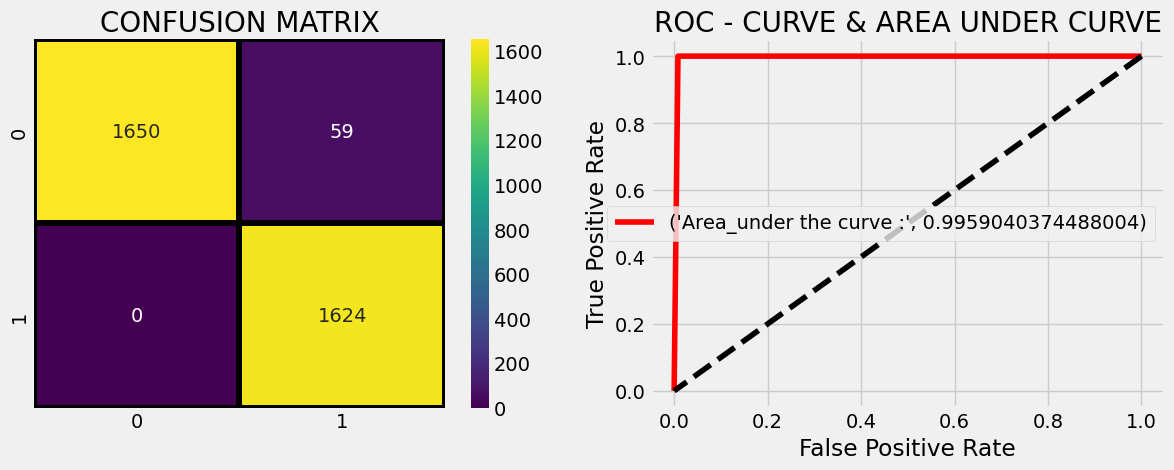

In [26]:
knn_model = KNeighborsClassifier()

knn_model.fit(train_X,train_y)

prediction=knn_model.predict(test_X)

print('Validation accuracy of KNN is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

Validation accuracy of Logistic Regression is 0.7263726372637264

Classification report :
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1709
           1       0.70      0.77      0.73      1624

    accuracy                           0.73      3333
   macro avg       0.73      0.73      0.73      3333
weighted avg       0.73      0.73      0.73      3333



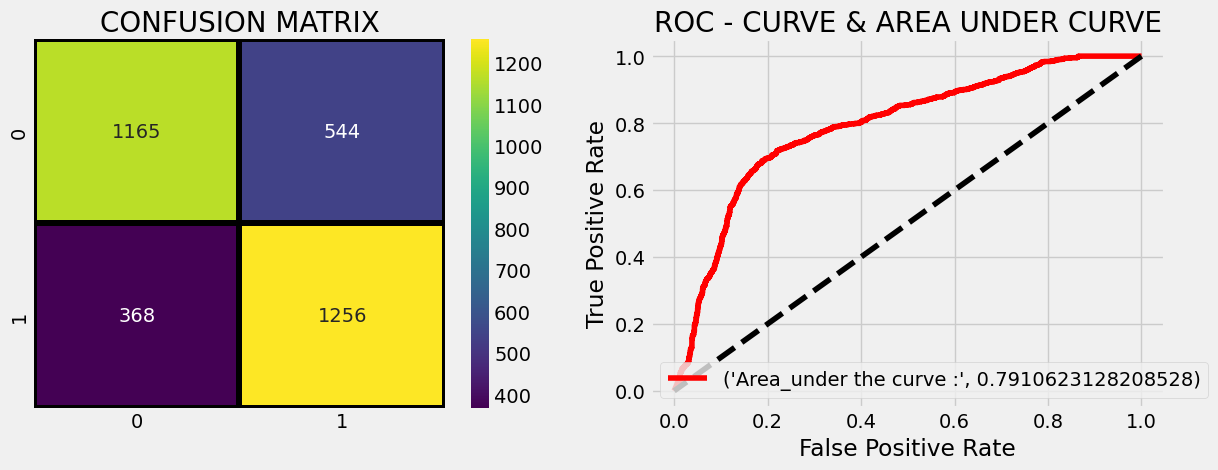

In [27]:
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(train_X,train_y)

prediction=lr_model.predict(test_X)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

As we can observe after applying SMOTE to balance the classes, our ML models are performing really good.

# Now it's time to apply all of this to some LifeSim data and try to think of some additional innovations.

First, lets load the data and split it into test and train datasets and change the "habitable" column from a boolean to an int

In [30]:
data = pd.read_csv('sim_catalog')
data_train = data[:10000].drop(columns = ['stype','name_s'])
data_test = data[10000:].drop(columns = ['stype','name_s'])
data_train["habitable"] = data_train["habitable"].astype(int)
data_test["habitable"] = data_test["habitable"].astype(int)
data_train

radius_p      p_orb    mass_p  ecc_p    inc_p  large_omega_p  \
0      2.55899    1.21237   6.46922    0.0  0.36825        0.83082   
1      1.62557   95.32925   2.94136    0.0  0.36825        4.71701   
2      0.64641  413.44526   0.18259    0.0  0.36825        3.59078   
3      1.45874   51.20469   5.36760    0.0  2.01016        2.62388   
4      2.03712   98.57858   4.45356    0.0  2.01016        1.71757   
...        ...        ...       ...    ...      ...            ...   
9995   0.61846   57.44866   0.14236    0.0  2.90408        5.42803   
9996   1.31919  162.09680   1.71530    0.0  1.94827        4.90003   
9997   2.86527  238.11522  12.30552    0.0  1.94827        6.07029   
9998   0.50299  374.37558   0.13657    0.0  1.94827        4.18341   
9999   0.61328   17.09476   0.35459    0.0  1.57411        4.65459   

      small_omega_p  theta_p  albedo_bond  albedo_geom_vis  ...     hz_in  \
0           4.28658  0.46104      0.07323          0.11134  ...  0.745910   
1           0.58424  3.76621      0.17084          0.46161  ...  0.745910   
2           0.90651  0.27668      0.54602          0.17279  ...  0.745910   
3           0.47298  2.25944      0.53153          0.47091  ...  0.745910   
4           2.04617  2.98199      0.32327          0.59087  ...  0.745910   
...             ...      ...          ...              ...  ...       ...   
9995        3.68573  1.92695      0.64542          0.09434  ...  0.757573   
9996        5.63228  3.87834      0.47804          0.21161  ...  0.757573   
9997        0.65380  1.73077      0.32779          0.01896  ...  0.757573   
9998        0.80129  2.61918      0.13769          0.40184  ...  0.757573   
9999        2.51672  5.34326      0.13469          0.24410  ...  0.757573   

        hz_out  hz_center  habitable     snr_1h   baseline  detected  \
0     1.746354   1.246132          0   3.747645  21.852210      True   
1     1.746354   1.246132          0   2.570891  21.852210      True   
2     1.746354   1.246132          1   0.051327  21.852210     False   
3     1.746354   1.246132          0   8.482665  21.852210      True   
4     1.746354   1.246132          0   7.213424  21.852210      True   
...        ...        ...        ...        ...        ...       ...   
9995  1.769708   1.263641          0   1.034909  25.864007     False   
9996  1.769708   1.263641          0   3.726342  25.864007     False   
9997  1.769708   1.263641          0  12.948075  25.864007     False   
9998  1.769708   1.263641          1   0.385875  25.864007     False   
9999  1.769708   1.263641          0   0.000001  25.864007     False   

      snr_current      int_time   t_slew  
0       11.808785  35743.408285      0.0  
1        8.100845  35743.408285      0.0  
2        0.161731  35743.408285      0.0  
3       26.728775  35743.408285      0.0  
4       22.729412  35743.408285      0.0  
...           ...           ...      ...  
9995     0.000000      0.000000 -36000.0  
9996     0.000000      0.000000 -36000.0  
9997     0.000000      0.000000 -36000.0  
9998     0.000000      0.000000 -36000.0  
9999     0.000000      0.000000 -36000.0  

[10000 rows x 43 columns]

Now, let's see how unbalanced is out data

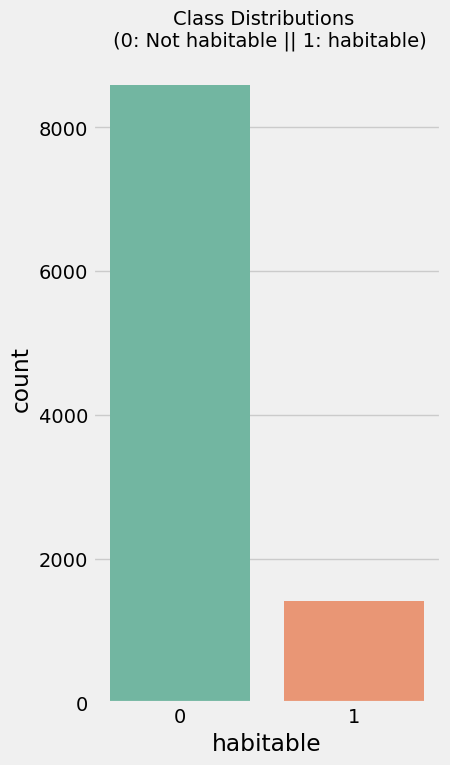

In [31]:
plt.figure(figsize=(4,8))
colors = ["0", "1"]
sns.countplot(x='habitable', data=data_train, palette = "Set2")
plt.title('Class Distributions \n (0: Not habitable || 1: habitable)', fontsize=14)
plt.show()

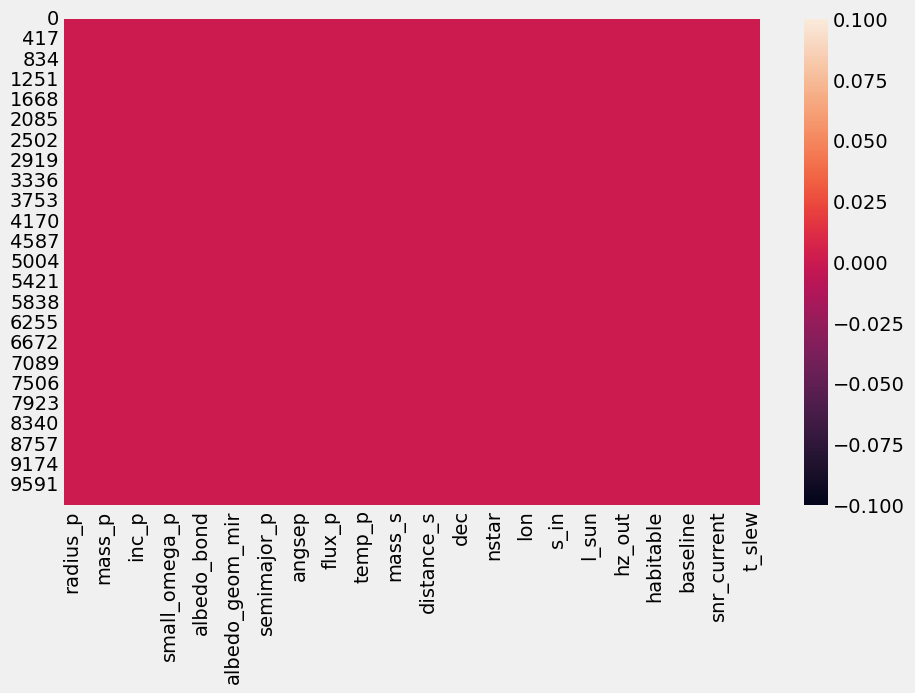

In [41]:
sns.heatmap(data_train.isnull())
plt.show()

Have a look at the correlation matrix:

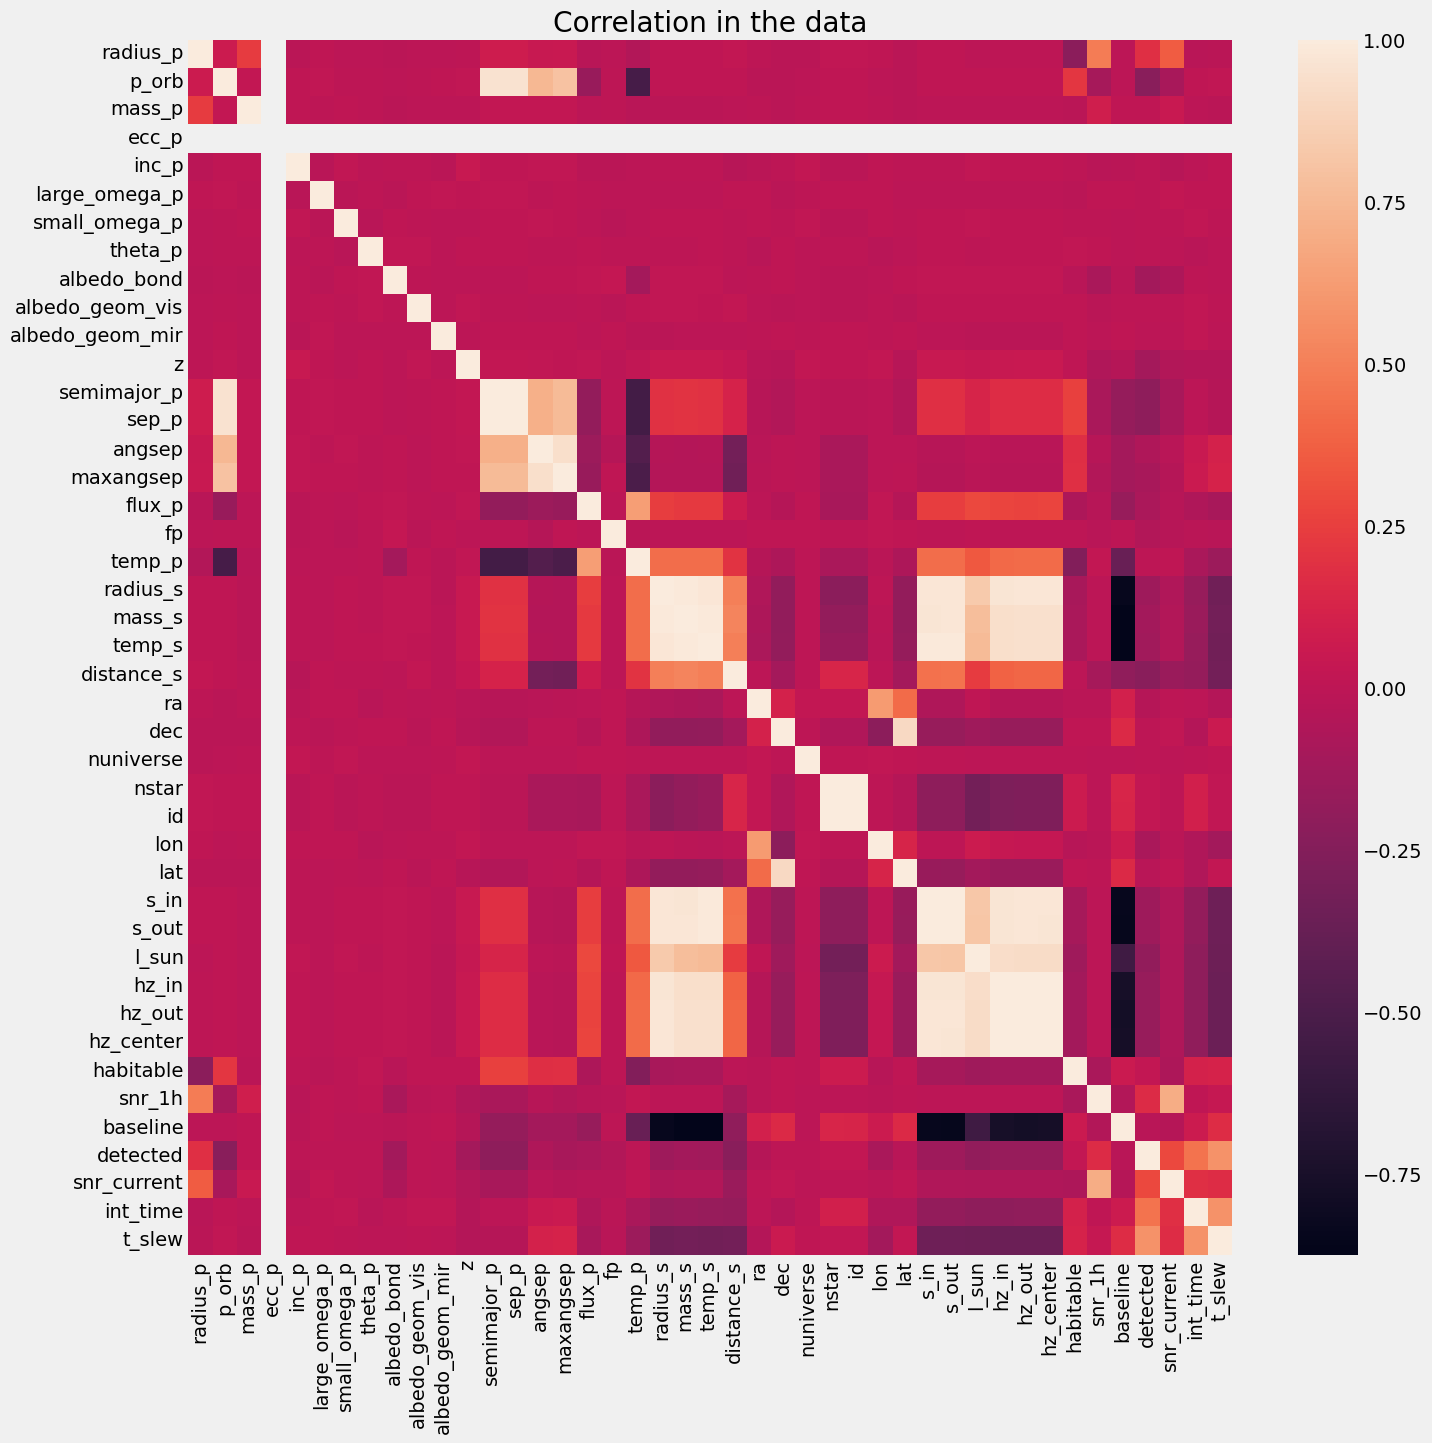

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(data_train.corr())
plt.title('Correlation in the data')
plt.show()

Since we already know that it's hard to make predictions with unbalanced data, let's start direcctly woth SMOTE

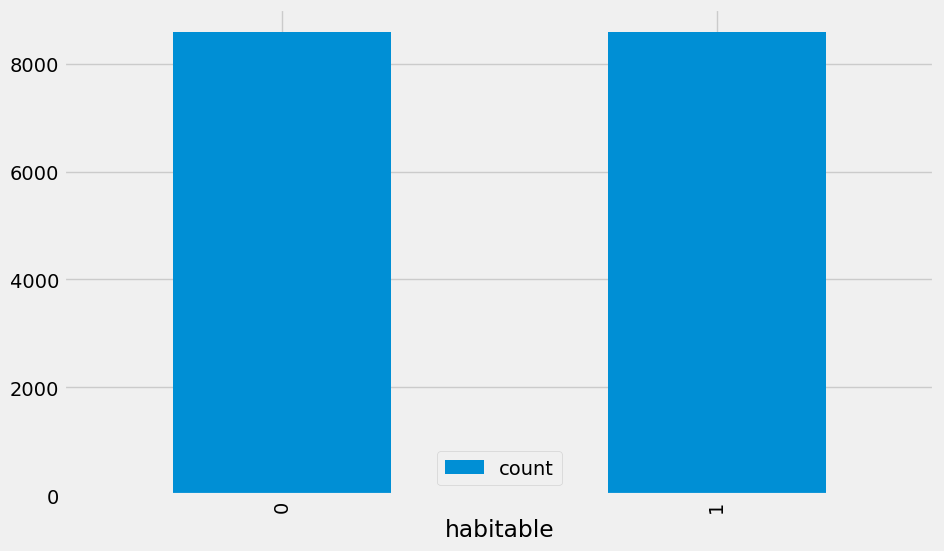

In [43]:
model = SMOTE()
ov_train_x_ls,ov_train_y_ls = model.fit_resample(data_train.drop('habitable',axis=1), data_train['habitable'])
ov_train_y_ls = ov_train_y_ls.astype('int')

ov_train_y_ls.value_counts().reset_index().plot(kind='bar', x='habitable', y='count')
plt.show()

Now that we have out beautiful oversampled data, we can try some of the models. In the original code, they split the training set, all of which is oversampled, into new train and test sets. Here, we are going to use the oversampled set to train and the not oversampled test set to test and let's see what happens. If that works it would be much more usefull, since, ideally, we want to train a model that can be used on pretty much raw data with high accuracy. 

Validation accuracy of Decision Tree is 0.9907592407592407

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3436
           1       0.95      0.98      0.97       568

    accuracy                           0.99      4004
   macro avg       0.97      0.99      0.98      4004
weighted avg       0.99      0.99      0.99      4004



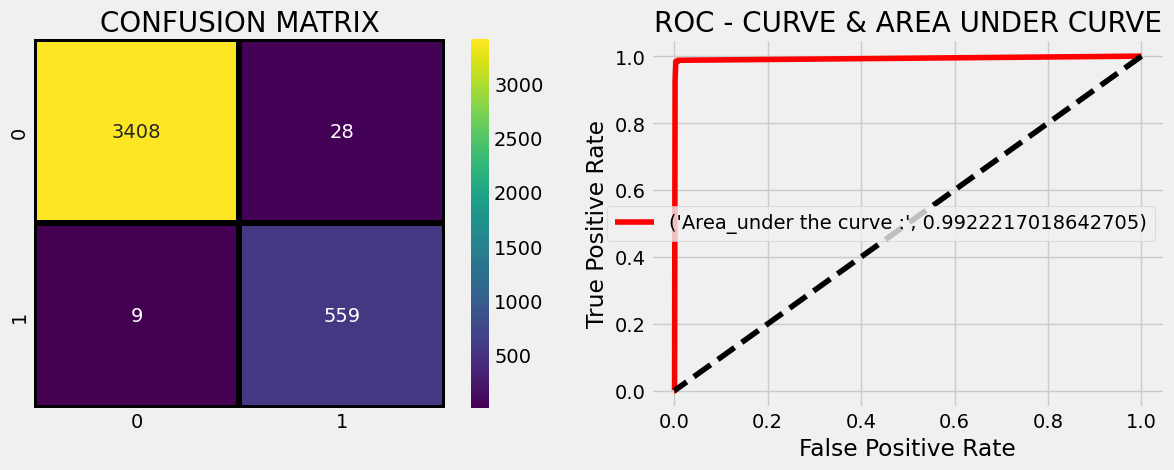

In [45]:
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(ov_train_x_ls,ov_train_y_ls)

prediction=ds_model.predict(data_test.drop('habitable', axis=1))

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,data_test['habitable']))
print ("\nClassification report :\n",(classification_report(data_test['habitable'],prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(data_test['habitable'],prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(data_test.drop('habitable', axis=1))[:,1]
fpr,tpr,thresholds = roc_curve(data_test['habitable'],predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

As we can see, this procedure works wonderfully!!! Let's explore the other two models

Validation accuracy of KNN is 0.525974025974026

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.50      0.65      3436
           1       0.18      0.65      0.28       568

    accuracy                           0.53      4004
   macro avg       0.54      0.58      0.46      4004
weighted avg       0.80      0.53      0.59      4004



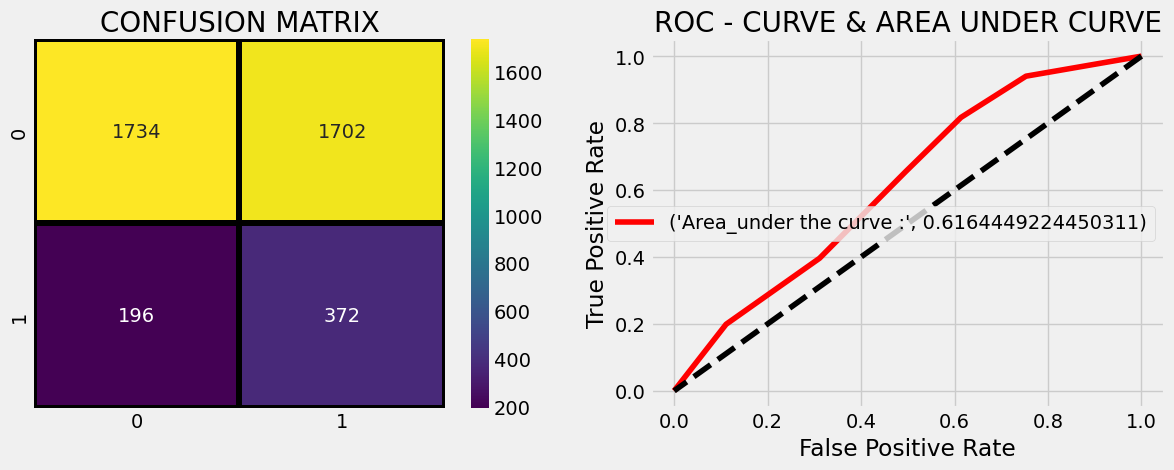

In [47]:
knn_model = KNeighborsClassifier()

knn_model.fit(ov_train_x_ls,ov_train_y_ls)

prediction=knn_model.predict(data_test.drop('habitable', axis=1))

print('Validation accuracy of KNN is', accuracy_score(prediction,data_test['habitable']))
print ("\nClassification report :\n",(classification_report(data_test['habitable'],prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(data_test['habitable'],prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(data_test.drop('habitable', axis=1))[:,1]
fpr,tpr,thresholds = roc_curve(data_test['habitable'],predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

Validation accuracy of Logistic Regression is 0.8581418581418582

Classification report :
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      3436
           1       0.00      0.00      0.00       568

    accuracy                           0.86      4004
   macro avg       0.43      0.50      0.46      4004
weighted avg       0.74      0.86      0.79      4004



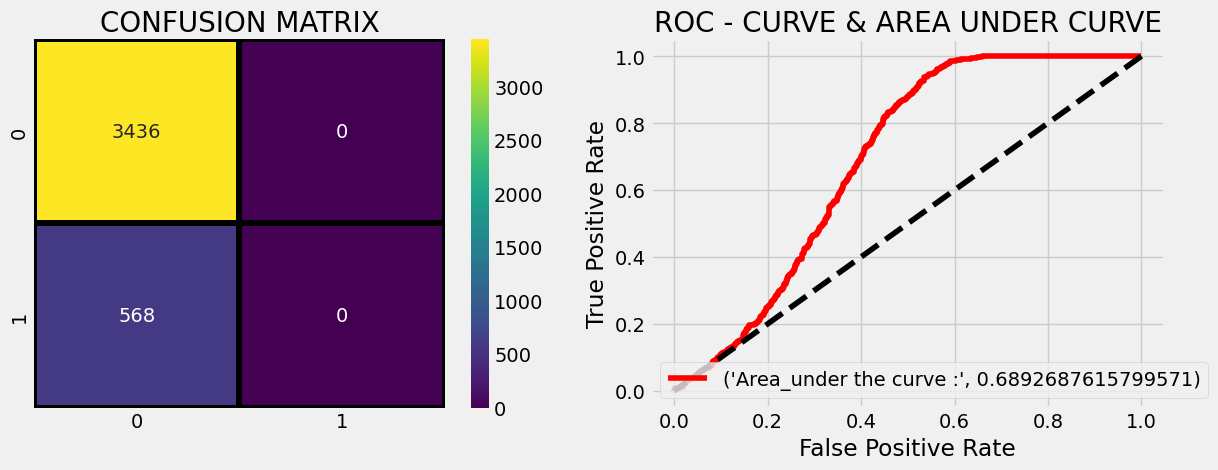

In [46]:
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(ov_train_x_ls,ov_train_y_ls)

prediction=lr_model.predict(data_test.drop('habitable', axis=1))

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,data_test['habitable']))
print ("\nClassification report :\n",(classification_report(data_test['habitable'],prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(data_test['habitable'],prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(data_test.drop('habitable', axis=1))[:,1]
fpr,tpr,thresholds = roc_curve(data_test['habitable'],predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

We can see that the simple decision tree works way better in this case